covid-geography


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

df_covid_data = pd.read_csv(r"C:\Users\kacha\Downloads\mmsa-icu-beds.csv")

In [51]:
df_covid_data.head(5)
df_covid_data.dropna()

,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk,Metro_area,State,equired_icu_beds,required_icu_beds,icu_shortfall
1,"Manhattan, KS",0.0,4489.848750,8979.69750,8.0,4.0,35918.79,Manhattan,KS,71.83758,71.83758,63.83758
2,"Hilton Head Island-Bluffton-Beaufort, SC",0.0,3904.163571,36438.86000,28.0,3.0,109316.58,Hilton Head Island-Bluffton-Beaufort,SC,218.63316,218.63316,190.63316
3,"Kahului-Wailuku-Lahaina, HI",0.0,3860.557000,19302.78500,20.0,4.0,77211.14,Kahului-Wailuku-Lahaina,HI,154.42228,154.42228,134.42228
4,"Spartanburg, SC",0.0,3786.115556,85187.60000,45.0,2.0,170375.20,Spartanburg,SC,340.75040,340.75040,295.75040
5,"Baton Rouge, LA",0.0,3459.732500,39000.62091,124.0,11.0,429006.83,Baton Rouge,LA,858.01366,858.01366,734.01366
...,...,...,...,...,...,...,...,...,...,...,...,...
131,"Charleston, WV",0.0,831.689744,25948.72000,156.0,5.0,129743.60,Charleston,WV,259.48720,259.48720,103.48720
132,"Duluth, MN-WI",0.0,730.523135,12286.07091,185.0,11.0,135146.78,Duluth,MN-WI,270.29356,270.29356,85.29356
133,"Reno, NV",0.0,638.824743,42290.19800,331.0,5.0,211450.99,Reno,NV,422.90198,422.90198,91.90198
134,"Gainesville, FL",0.0,621.449952,65252.24500,210.0,2.0,130504.49,Gainesville,FL,261.00898,261.00898,51.00898


In [52]:
#  10 regions that have the highest percentage of at-risk population?", (.loc,.iloc and sort)
high_risk_region = df_covid_data.sort_values('total_percent_at_risk', ascending= False).reset_index().head(10)
high_risk_region

,index,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk,Metro_area,State,equired_icu_beds,required_icu_beds,icu_shortfall
0,0,"San Juan-Carolina-Caguas, PR",0.0,NaN,NaN,NaN,NaN,923725.203,San Juan-Carolina-Caguas,PR,1847.450406,1847.450406,NaN
1,1,"Manhattan, KS",0.0,4489.848750,8979.69750,8.0,4.0,35918.790,Manhattan,KS,71.837580,71.837580,63.83758
2,2,"Hilton Head Island-Bluffton-Beaufort, SC",0.0,3904.163571,36438.86000,28.0,3.0,109316.580,Hilton Head Island-Bluffton-Beaufort,SC,218.633160,218.633160,190.63316
3,3,"Kahului-Wailuku-Lahaina, HI",0.0,3860.557000,19302.78500,20.0,4.0,77211.140,Kahului-Wailuku-Lahaina,HI,154.422280,154.422280,134.42228
4,4,"Spartanburg, SC",0.0,3786.115556,85187.60000,45.0,2.0,170375.200,Spartanburg,SC,340.750400,340.750400,295.75040
5,5,"Baton Rouge, LA",0.0,3459.732500,39000.62091,124.0,11.0,429006.830,Baton Rouge,LA,858.013660,858.013660,734.01366
6,6,"Rockingham County-Strafford County, NH, Metrop...",0.0,3365.052000,40380.62400,60.0,5.0,201903.120,Rockingham County-Strafford County,"NH, Metropolitan Division",403.806240,403.806240,343.80624
7,7,"Salisbury, MD-DE",0.0,3292.271176,37312.40667,68.0,6.0,223874.440,Salisbury,MD-DE,447.748880,447.748880,379.74888
8,8,"Wichita Falls, TX",0.0,3279.425000,19676.55000,24.0,4.0,78706.200,Wichita Falls,TX,157.412400,157.412400,133.41240
9,9,"Colorado Springs, CO",0.0,3251.603053,77225.57250,95.0,4.0,308902.290,Colorado Springs,CO,617.804580,617.804580,522.80458


In [53]:
# 10 areas have the fewest ICU beds per 1,000 high-risk people using Sort_value()

df_covid_data['ICU_bed_per_1000'] = (df_covid_data['icu_beds']  / df_covid_data['total_at_risk']) *1000

top_10_area_1000 = df_covid_data[['MMSA','ICU_bed_per_1000']].sort_values('ICU_bed_per_1000', ascending= False).reset_index().head(10)
top_10_area_1000


,index,MMSA,ICU_bed_per_1000
0,135,"Rochester, MN",2.417399
1,134,"Gainesville, FL",1.609140
2,133,"Reno, NV",1.565375
3,132,"Duluth, MN-WI",1.368882
4,131,"Charleston, WV",1.202371
5,130,"Bismarck, ND",1.157211
6,129,"Fargo, ND-MN",1.148918
7,128,"Evansville, IN-KY",1.119173
8,127,"Scottsbluff, NE",1.112006
9,126,"Lexington-Fayette, KY",1.092049


In [54]:
# 10 areas that have the fewest ICU beds per 1,000 high-risk people using loc[]


df_covid_data['ICU_bed_per_1000'] = (df_covid_data['icu_beds']  / df_covid_data['total_at_risk']) *1000
top_10_area_1000_loc = df_covid_data.loc[:,['MMSA','ICU_bed_per_1000']].sort_values('ICU_bed_per_1000', ascending= False).reset_index().head(10)
top_10_area_1000_loc
 


,index,MMSA,ICU_bed_per_1000
0,135,"Rochester, MN",2.417399
1,134,"Gainesville, FL",1.609140
2,133,"Reno, NV",1.565375
3,132,"Duluth, MN-WI",1.368882
4,131,"Charleston, WV",1.202371
5,130,"Bismarck, ND",1.157211
6,129,"Fargo, ND-MN",1.148918
7,128,"Evansville, IN-KY",1.119173
8,127,"Scottsbluff, NE",1.112006
9,126,"Lexington-Fayette, KY",1.092049


In [55]:
# 10 areas that have the fewest ICU beds per 1,000 high-risk people using iloc[]

df_covid_data['ICU_bed_per_1000'] = (df_covid_data['icu_beds']  / df_covid_data['total_at_risk']) *1000

top_10_area_1000_iloc = df_covid_data.iloc[:,[0,-1]].sort_values('ICU_bed_per_1000', ascending= False).reset_index().head(10)
top_10_area_1000_iloc

,index,MMSA,ICU_bed_per_1000
0,135,"Rochester, MN",2.417399
1,134,"Gainesville, FL",1.609140
2,133,"Reno, NV",1.565375
3,132,"Duluth, MN-WI",1.368882
4,131,"Charleston, WV",1.202371
5,130,"Bismarck, ND",1.157211
6,129,"Fargo, ND-MN",1.148918
7,128,"Evansville, IN-KY",1.119173
8,127,"Scottsbluff, NE",1.112006
9,126,"Lexington-Fayette, KY",1.092049


In [ ]:
# 10 hospitals that are facing the greatest burden in terms of high-risk patients per hospital
high_risk_hospital = df_covid_data.sort_values('high_risk_per_hospital',ascending= False).reset_index().head(10)
high_risk_hospital


,index,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk,Metro_area,State,equired_icu_beds,required_icu_beds,icu_shortfall,ICU_bed_per_1000
0,83,"Orlando-Kissimmee-Sanford, FL",0.0,1694.240231,91771.34583,650.0,12.0,1101256.15,Orlando-Kissimmee-Sanford,FL,2202.51230,2202.51230,1552.51230,0.590235
1,4,"Spartanburg, SC",0.0,3786.115556,85187.60000,45.0,2.0,170375.20,Spartanburg,SC,340.75040,340.75040,295.75040,0.264123
2,82,"Port St. Lucie, FL",0.0,1712.978951,81651.99667,143.0,3.0,244955.99,Port St. Lucie,FL,489.91198,489.91198,346.91198,0.583778
3,50,"Camden, NJ, Metropolitan Division",0.0,2109.945288,77804.23250,295.0,8.0,622433.86,Camden,"NJ, Metropolitan Division",1244.86772,1244.86772,949.86772,0.473946
4,9,"Colorado Springs, CO",0.0,3251.603053,77225.57250,95.0,4.0,308902.29,Colorado Springs,CO,617.80458,617.80458,522.80458,0.307541
5,38,"New York-Jersey City-White Plains, NY-NJ, Metr...",0.0,2302.129085,75184.16695,2678.0,82.0,6165101.69,New York-Jersey City-White Plains,"NY-NJ, Metropolitan Division",12330.20338,12330.20338,9652.20338,0.434381
6,11,"Albuquerque, NM",0.0,3091.331014,71100.61333,138.0,6.0,426603.68,Albuquerque,NM,853.20736,853.20736,715.20736,0.323485
7,13,"Silver Spring-Frederick-Rockville, MD, Metropo...",0.0,2929.015833,70296.38000,168.0,7.0,492074.66,Silver Spring-Frederick-Rockville,"MD, Metropolitan Division",984.14932,984.14932,816.14932,0.341412
8,25,"Wilmington, DE-MD-NJ, Metropolitan Division",0.0,2441.704685,69832.75400,143.0,5.0,349163.77,Wilmington,"DE-MD-NJ, Metropolitan Division",698.32754,698.32754,555.32754,0.409550
9,59,"Hagerstown-Martinsburg, MD-WV",0.0,2022.890441,68778.27500,68.0,2.0,137556.55,Hagerstown-Martinsburg,MD-WV,275.11310,275.11310,207.11310,0.494342


In [157]:
    # Filter areas with >60% at-risk population and <30 ICU beds
Filterd_areas =df_covid_data[(df_covid_data['total_percent_at_risk'] > 60 )  & (df_covid_data['icu_beds'] < 30)]
Filterd_areas

,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk,Metro_area,State,equired_icu_beds,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,ICU_bed_per_capita


In [ ]:
# still having issue in this question

 # Average at-risk percentage by state
df_covid_data['total_percent_at_risk'] = pd.to_numeric(df_covid_data['total_percent_at_risk'], errors='coerce')

df_covid_data[['Metro_area', 'State1']] = df_covid_data['MMSA'].str.split(',', n=1 ,expand= True)
df_covid_data[['State', 'State3']] = df_covid_data['State1'].str.rsplit('-', n=1 ,expand= True)

avg_risk_ = df_covid_data.groupby('State')['total_percent_at_risk'].mean()
avg_risk_



State
AK                           0.0
AL                           0.0
AR                           0.0
AZ                           0.0
CA                           0.0
                            ... 
WA                           0.0
WA, Metropolitan Division    0.0
WI                           0.0
WV                           0.0
WV-KY                        0.0
Name: total_percent_at_risk, Length: 65, dtype: float64

In [ ]:
df_covid_data[['Metro_area', 'State1']] = df_covid_data['MMSA'].str.split(',', n=1 ,expand= True)
df_covid_data[['State2', 'State3']] = df_covid_data['State1'].str.rsplit('-', n=1 ,expand= True)



,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk,Metro_area,State,equired_icu_beds,required_icu_beds,icu_shortfall,ICU_bed_per_1000,Rank_high_risk_individual,State1,State2,State3
0,"San Juan-Carolina-Caguas, PR",0.0,NaN,NaN,NaN,NaN,923725.203,San Juan-Carolina-Caguas,PR,1847.450406,1847.450406,NaN,NaN,NaN,PR,PR,None
1,"Manhattan, KS",0.0,4489.848750,8979.69750,8.0,4.0,35918.790,Manhattan,KS,71.837580,71.837580,63.83758,0.222725,134.0,KS,KS,None
2,"Hilton Head Island-Bluffton-Beaufort, SC",0.0,3904.163571,36438.86000,28.0,3.0,109316.580,Hilton Head Island-Bluffton-Beaufort,SC,218.633160,218.633160,190.63316,0.256137,92.0,SC,SC,None
3,"Kahului-Wailuku-Lahaina, HI",0.0,3860.557000,19302.78500,20.0,4.0,77211.140,Kahului-Wailuku-Lahaina,HI,154.422280,154.422280,134.42228,0.259030,122.0,HI,HI,None
4,"Spartanburg, SC",0.0,3786.115556,85187.60000,45.0,2.0,170375.200,Spartanburg,SC,340.750400,340.750400,295.75040,0.264123,2.0,SC,SC,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,"Charleston, WV",0.0,831.689744,25948.72000,156.0,5.0,129743.600,Charleston,WV,259.487200,259.487200,103.48720,1.202371,111.0,WV,WV,None
132,"Duluth, MN-WI",0.0,730.523135,12286.07091,185.0,11.0,135146.780,Duluth,MN-WI,270.293560,270.293560,85.29356,1.368882,130.0,MN-WI,MN,WI
133,"Reno, NV",0.0,638.824743,42290.19800,331.0,5.0,211450.990,Reno,NV,422.901980,422.901980,91.90198,1.565375,69.0,NV,NV,None
134,"Gainesville, FL",0.0,621.449952,65252.24500,210.0,2.0,130504.490,Gainesville,FL,261.008980,261.008980,51.00898,1.609140,14.0,FL,FL,None


In [60]:
# A correlation between ICU beds and the % at-risk
correlation = df_covid_data['total_percent_at_risk'].corr(df_covid_data['icu_beds'])
correlation

c:\Users\kacha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\kacha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


np.float64(nan)

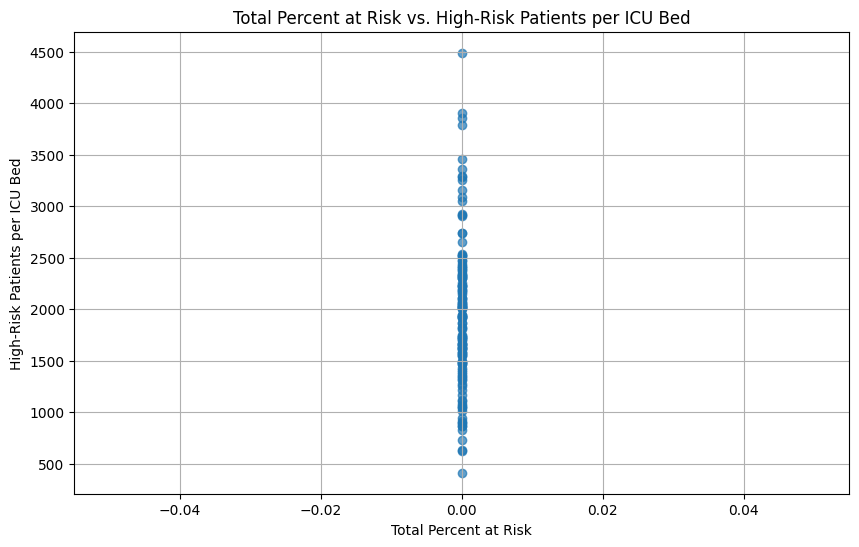

In [61]:
#  Visualize total percent at-risk vs. high-risk per ICU bed

plt.figure(figsize=(10, 6))
plt.scatter(df_covid_data['total_percent_at_risk'], df_covid_data['high_risk_per_ICU_bed'], alpha=0.7)
plt.title('Total Percent at Risk vs. High-Risk Patients per ICU Bed')
plt.xlabel('Total Percent at Risk')
plt.ylabel('High-Risk Patients per ICU Bed')
plt.grid(True)
plt.show()



In [62]:
#  Estimate ICU shortfall if we need 1 ICU bed per 500 high-risk individuals

df_covid_data['required_icu_beds'] = df_covid_data['total_at_risk'] / 500
df_covid_data['icu_shortfall'] = df_covid_data['required_icu_beds'] - df_covid_data['icu_beds']
icu_shortfall = df_covid_data['icu_shortfall']
df_covid_data

,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk,Metro_area,State,equired_icu_beds,required_icu_beds,icu_shortfall,ICU_bed_per_1000
0,"San Juan-Carolina-Caguas, PR",0.0,NaN,NaN,NaN,NaN,923725.203,San Juan-Carolina-Caguas,PR,1847.450406,1847.450406,NaN,NaN
1,"Manhattan, KS",0.0,4489.848750,8979.69750,8.0,4.0,35918.790,Manhattan,KS,71.837580,71.837580,63.83758,0.222725
2,"Hilton Head Island-Bluffton-Beaufort, SC",0.0,3904.163571,36438.86000,28.0,3.0,109316.580,Hilton Head Island-Bluffton-Beaufort,SC,218.633160,218.633160,190.63316,0.256137
3,"Kahului-Wailuku-Lahaina, HI",0.0,3860.557000,19302.78500,20.0,4.0,77211.140,Kahului-Wailuku-Lahaina,HI,154.422280,154.422280,134.42228,0.259030
4,"Spartanburg, SC",0.0,3786.115556,85187.60000,45.0,2.0,170375.200,Spartanburg,SC,340.750400,340.750400,295.75040,0.264123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,"Charleston, WV",0.0,831.689744,25948.72000,156.0,5.0,129743.600,Charleston,WV,259.487200,259.487200,103.48720,1.202371
132,"Duluth, MN-WI",0.0,730.523135,12286.07091,185.0,11.0,135146.780,Duluth,MN-WI,270.293560,270.293560,85.29356,1.368882
133,"Reno, NV",0.0,638.824743,42290.19800,331.0,5.0,211450.990,Reno,NV,422.901980,422.901980,91.90198,1.565375
134,"Gainesville, FL",0.0,621.449952,65252.24500,210.0,2.0,130504.490,Gainesville,FL,261.008980,261.008980,51.00898,1.609140


In [135]:
# Rank regions by high-risk individuals per hospital

df_covid_data_sorted = df_covid_data.sort_values('high_risk_per_hospital', ascending=False)

df_covid_data_sorted['Rank_high_risk_individual'] = df_covid_data_sorted['high_risk_per_hospital'].rank(ascending=False)

df_covid_data_sorted['Rank_high_risk_individual'] = df_covid_data_sorted['Rank_high_risk_individual'].astype('Int64')

print(df_covid_data_sorted[['MMSA','Rank_high_risk_individual', 'high_risk_per_hospital']])


                                 MMSA  Rank_high_risk_individual  \
83      Orlando-Kissimmee-Sanford, FL                          1   
4                     Spartanburg, SC                          2   
82                 Port St. Lucie, FL                          3   
50  Camden, NJ, Metropolitan Division                          4   
9                Colorado Springs, CO                          5   
..                                ...                        ...   
92                         Salina, KS                        132   
28                   Grand Island, NE                        133   
1                       Manhattan, KS                        134   
57                       Aberdeen, SD                        135   
0        San Juan-Carolina-Caguas, PR                       <NA>   

    high_risk_per_hospital  
83            91771.345830  
4             85187.600000  
82            81651.996670  
50            77804.232500  
9             77225.572500  
..       

In [ ]:
 # Composite risk score to rank all regions



0        NaN
1      134.0
2       92.0
3      122.0
4        2.0
       ...  
131    111.0
132    130.0
133     69.0
134     14.0
135    115.0
Name: Rank_high_risk_individual, Length: 136, dtype: float64

In [ ]:
 #  Top 10 Regions with Most ICU Beds per Capita 
df_covid_data['ICU_bed_per_capita'] = (df_covid_data['icu_beds'] / df_covid_data['total_at_risk'])

df_covid_data_sort = df_covid_data.sort_values('ICU_bed_per_capita', ascending= False).head(10)
df_covid_data_sort

,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk,Metro_area,State,equired_icu_beds,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,ICU_bed_per_capita
135,"Rochester, MN",0.0,413.667706,22544.89000,218.0,4.0,90179.56,Rochester,MN,180.35912,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.002417
134,"Gainesville, FL",0.0,621.449952,65252.24500,210.0,2.0,130504.49,Gainesville,FL,261.00898,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001609
133,"Reno, NV",0.0,638.824743,42290.19800,331.0,5.0,211450.99,Reno,NV,422.90198,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001565
132,"Duluth, MN-WI",0.0,730.523135,12286.07091,185.0,11.0,135146.78,Duluth,MN,270.29356,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001369
131,"Charleston, WV",0.0,831.689744,25948.72000,156.0,5.0,129743.60,Charleston,WV,259.48720,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001202
130,"Bismarck, ND",0.0,864.146389,20739.51333,72.0,3.0,62218.54,Bismarck,ND,124.43708,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001157
129,"Fargo, ND-MN",0.0,870.383784,48306.30000,111.0,2.0,96612.60,Fargo,ND,193.22520,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001149
128,"Evansville, IN-KY",0.0,893.516895,33953.64200,190.0,5.0,169768.21,Evansville,IN,339.53642,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001119
127,"Scottsbluff, NE",0.0,899.275909,19784.07000,22.0,1.0,19784.07,Scottsbluff,NE,39.56814,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001112
126,"Lexington-Fayette, KY",0.0,915.709604,31820.90875,278.0,8.0,254567.27,Lexington-Fayette,KY,509.13454,...,0.001112,0.001119,0.001149,0.001157,0.001202,0.001369,0.001565,0.001609,0.002417,0.001092


In [ ]:

# Assuming df_covid_data is your DataFrame
regions_no_icu_beds = df_covid_data[df_covid_data['icu_beds'].isna() | (df_covid_data['icu_beds'] == 0)]

print(regions_no_icu_beds[['MMSA', 'icu_beds']])


                           MMSA  icu_beds
0  San Juan-Carolina-Caguas, PR       NaN


In [156]:
# Regions With No Hospitals

regions_no_hospitals = df_covid_data[df_covid_data['hospitals'].isna() | (df_covid_data['hospitals'] == 0)]

print(regions_no_hospitals[['MMSA', 'hospitals']])


                           MMSA  hospitals
0  San Juan-Carolina-Caguas, PR        NaN
